### Recomendaciones del profesor

1. Eliminar: 

    - TIPO_ENTIDAD, CODIGO_ENTIDAD, SUBTIPO_NEGOCIO, CODIGO_NEGOCIO, TIPO_PARTICIPACION: No es necesario tener un codigo y un nombre, es mejor trabajar con una de las columnas solamente para ahorrar recursos.

    - PRECIERRE_FONDO_DIA_T: Dado que hay un cierre cada dia, eliminar esta, ya que incluso repite los mismo valores que el VALOR_FONDO_CIERRE_DIA_T

    - NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR: Lo mismo que el de arriba, pero con la diferencia de que este se puede consultar de otras formas, ya que mediante un groupby que se realizó hay cierta cantidad de valores por cada dia del año

2. Verificar:

    - RENTABILIDAD_DIARIA: Verificar si se puede eliminar esta, dado que depende de si se desea trabajar con respecto a los meses o años. Incluso hay rentabilidades mensuales y semestrales. Se cree que se puede prescindir de esta columna.

    - NOMBRE_TIPO_ENTIDAD: Ver si se puede Renombrar las entidades alli contenidas. Por ejemplo: "SOCIEDADES ADMINISTRADORAS DE INVERSIÓN", sería "SADI" y dejar su respectivo comentaria para saber que significa. Esto con el fin de ahorrar recursos en el analisis de los datos

3. Recomendaciones:

    - Trabajar con una muestra de los datos, ya que al trabajar con todos se distorciona la informacion (como sucede con las graficas de bigotes).

    - El profe recomienda usar la data donde se encuentra la mayor cantidad de informacion. La cual seria la informacion superior a 3 cifras de acuerdo a las rentabilidades (Hay una grafica con respecto a eso), dado que alli siempre se encuentra una informacion superior al 80%, y el resto de los datos apenas si logran el 20% restante.

    - Al realizar esos cambios, ver si se puede ejecutar el Report Visual (ultimo codigo), ya que consume demasiada memoria y no funciona sin el "minimal=True", lo cual reduce el analisis. Sino, no hay problema, ya que solo es para visualizar los datos

*NOTA IMPORTANTE: REALIZAR ESOS CAMBIOS EN LA PARTE QUE SE CREA QUE AHÍ VA* 

# Exportacion de librerias y creacion de la db

In [1]:
import altair as alt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Creacion del dataframe y la base de datos junto con el formateo necesario para visualizar de mejor forma la data

In [2]:
#Intentar traer los datos a utilizar en formato csv
try:    
    
    df_FondosInversion_colectiva = pd.read_csv("C:/Users/migue/Music/MINTIC/mintic/modulo1/fuente de datos/Rentabilidades_de_los_Fondos_de_Inversi_n_Colectiva__FIC__20240914.csv")	
    print("Se cargo exitosamente la fuente de datos")

#Error en la lectura del archivo
except FileExistsError as e:
    print("Error encontrado: ",e)
    
#Cualquier otro tipo de error
except Exception as e:
    print("Error: ",e)
    
df_FondosInversion_colectiva


Se cargo exitosamente la fuente de datos


,FECHA_CORTE,TIPO_ENTIDAD,NOMBRE_TIPO_ENTIDAD,CODIGO_ENTIDAD,NOMBRE_ENTIDAD,TIPO_NEGOCIO,NOMBRE_TIPO_PATRIMONIO,SUBTIPO_NEGOCIO,NOMBRE_SUBTIPO_PATRIMONIO,CODIGO_NEGOCIO,...,VALOR_UNIDAD_OPERACIONES_DIA_T,APORTES_RECIBIDOS,RETIROS_REDENCIONES,ANULACIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_DIARIA,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL
0,20/07/2020,87,SOCIEDADES ADMINISTRADORAS DE INVERSIÓN,11,Progresion Sociedad Administradora De Inversio...,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,63109,...,1.181368e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.832705e+09,174.0,1.661225,3.968064,4.398817,3.585329
1,12/09/2021,5,SF-SOCIEDAD FIDUCIARIA,39,Sociedad Fiduciaria De Desarrollo Agropecuario...,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,69537,...,1.332654e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.059409e+11,6.0,2.056766,2.289001,1.044863,1.098479
2,09/12/2022,5,SF-SOCIEDAD FIDUCIARIA,7,Skandia Fiduciaria S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,97207,...,9.521426e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.189565e+09,1.0,-61.082414,6.700275,4.908149,-3.436502
3,23/08/2019,5,SF-SOCIEDAD FIDUCIARIA,38,Fiduciaria Central S.A. Sigla Fiducentral S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,7,FONDOS DE CAPITAL PRIVADO,73593,...,7.098215e+03,0.000000e+00,0.000000e+00,0.000000e+00,6.487057e+09,20.0,-5.188327,319.467674,-33.798042,-34.151399
4,04/06/2017,5,SF-SOCIEDAD FIDUCIARIA,3,Bbva Asset Management S.A. Sociedad Fiduciaria,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,8742,...,2.224918e+03,0.000000e+00,3.210000e+00,0.000000e+00,4.432557e+10,17.0,6.363919,7.210620,9.222093,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165929,25/06/2019,5,SF-SOCIEDAD FIDUCIARIA,58,Fiduciaria Sura S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,53965,...,1.540200e+04,1.454000e+10,1.378697e+10,0.000000e+00,1.828384e+10,19.0,6.447227,4.542283,6.339766,6.342125
2165930,22/05/2019,5,SF-SOCIEDAD FIDUCIARIA,16,Alianza Fiduciaria S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,10936,...,1.441174e+05,1.660222e+10,2.231338e+10,-1.019877e+10,4.651954e+11,22.0,6.372663,4.380132,4.022688,3.901669
2165931,12/09/2018,5,SF-SOCIEDAD FIDUCIARIA,21,Fiduciaria De Occidente S.A. - Fiduoccidente ...,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,9452,...,2.387673e+03,0.000000e+00,1.500000e+07,0.000000e+00,4.479968e+09,117.0,32.036194,0.843093,-6.836207,-1.554998
2165932,30/01/2020,5,SF-SOCIEDAD FIDUCIARIA,23,Itaú Fiduciaria,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,48153,...,4.308606e+06,2.717348e+09,7.697813e+09,-7.000000e+08,1.220547e+11,1224.0,5.539723,5.479480,3.684894,4.332866


Recomendacion del profe: Eliminar TIPO_ENTIDAD, CODIGO_ENTIDAD, SUBTIPO_NEGOCIO, CODIGO_NEGOCIO

# Validacion de datos

validacion aleatoria de los datos

In [3]:
df_FondosInversion_colectiva.sample(50)

,FECHA_CORTE,TIPO_ENTIDAD,NOMBRE_TIPO_ENTIDAD,CODIGO_ENTIDAD,NOMBRE_ENTIDAD,TIPO_NEGOCIO,NOMBRE_TIPO_PATRIMONIO,SUBTIPO_NEGOCIO,NOMBRE_SUBTIPO_PATRIMONIO,CODIGO_NEGOCIO,...,VALOR_UNIDAD_OPERACIONES_DIA_T,APORTES_RECIBIDOS,RETIROS_REDENCIONES,ANULACIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_DIARIA,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL
2105135,16/09/2021,5,SF-SOCIEDAD FIDUCIARIA,3,Bbva Asset Management S.A. Sociedad Fiduciaria,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,69368,...,13643.473802,9.895000e+07,1.267990e+06,0.000000e+00,1.594787e+10,1616.0,-48.304183,18.166586,13.444448,18.350433
2001103,26/12/2019,5,SF-SOCIEDAD FIDUCIARIA,31,Fiduciaria Bancolombia S.A. Sociedad Fiduciaria,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,3644,...,66271.841194,4.931024e+07,4.215931e+07,0.000000e+00,5.038346e+10,3813.0,-87.020043,63.812878,11.665044,22.104754
293129,20/12/2017,5,SF-SOCIEDAD FIDUCIARIA,16,Alianza Fiduciaria S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,67403,...,10394.286723,0.000000e+00,0.000000e+00,0.000000e+00,5.758541e+08,2.0,195.387947,38.457184,0.000000,0.000000
51004,13/08/2017,85,COMISIONISTAS DE BOLSA DE VALORES,62,Ultraserfinco S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,58434,...,4515.691154,0.000000e+00,0.000000e+00,0.000000e+00,3.445088e+10,23.0,4.731424,4.389361,6.249852,0.000000
1794755,25/08/2020,5,SF-SOCIEDAD FIDUCIARIA,25,"Scotiabank Fiduciaria Colpatria"", ""Colpatria S...",9,FONDOS DE INVERSIÓN COLECTIVA,7,FONDOS DE CAPITAL PRIVADO,75122,...,19484.827734,0.000000e+00,0.000000e+00,0.000000e+00,2.202007e+11,4.0,216.122883,3087.033646,109.559709,52.340151
2095243,12/05/2022,85,COMISIONISTAS DE BOLSA DE VALORES,22,Valores Bancolombia S.A. Comisionista De Bolsa,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,59304,...,10181.452429,2.000000e+10,4.530060e+10,0.000000e+00,1.723322e+11,7.0,10.016958,4.708656,3.796613,0.000000
1143693,18/01/2018,5,SF-SOCIEDAD FIDUCIARIA,3,Bbva Asset Management S.A. Sociedad Fiduciaria,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,8734,...,2299.599338,0.000000e+00,5.840000e+00,0.000000e+00,2.924558e+10,4.0,5.609923,5.392307,0.000000,0.000000
808380,20/03/2017,85,COMISIONISTAS DE BOLSA DE VALORES,28,Credicorp Capital,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,58900,...,14495.521402,0.000000e+00,0.000000e+00,0.000000e+00,1.003706e+10,170.0,11.308193,4.461378,6.187001,6.273158
70834,28/11/2020,5,SF-SOCIEDAD FIDUCIARIA,62,Fiduciaria Coomeva S.A.,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,71197,...,11371.919441,0.000000e+00,0.000000e+00,0.000000e+00,6.152944e+09,591.0,0.389482,2.637969,3.843786,3.984046
1218705,11/11/2018,85,COMISIONISTAS DE BOLSA DE VALORES,26,Corredores Davivienda S.A.Comisionista De Bolsa,9,FONDOS DE INVERSIÓN COLECTIVA,1,FIC DE TIPO GENERAL,78888,...,10005.467600,0.000000e+00,0.000000e+00,0.000000e+00,2.501367e+05,1.0,2.010347,0.000000,0.000000,0.000000


Validacion de cantidad de columnas y filas

In [4]:
# Se crea un DataFrame nuevo, utilizando los datos existentes del dataset
df_FondosInversion_colectiva = pd.DataFrame(df_FondosInversion_colectiva)

# Consulta y validación de la cantidad de filas y columnas del dataframe
num_rows, num_cols = df_FondosInversion_colectiva.shape

# Imprimir mensaje y valores de salidas del dataframe
print(f'Datos del dataframe: \nFilas: {num_rows} \nColumnas: {num_cols}')

Datos del dataframe: 
Filas: 2165934 
Columnas: 26


# Verificacion de cuantos datos hay por cada tipo de dato en columnas

In [5]:
df_FondosInversion_colectiva['TIPO_ENTIDAD'].value_counts().reset_index()

,TIPO_ENTIDAD,count
0,5,1457796
1,85,659843
2,87,48295


In [6]:
df_FondosInversion_colectiva['NOMBRE_TIPO_ENTIDAD'].value_counts().reset_index()

,NOMBRE_TIPO_ENTIDAD,count
0,SF-SOCIEDAD FIDUCIARIA,1457796
1,COMISIONISTAS DE BOLSA DE VALORES,659843
2,SOCIEDADES ADMINISTRADORAS DE INVERSIÓN,48295


In [7]:
df_FondosInversion_colectiva['NOMBRE_ENTIDAD'].value_counts().reset_index()

,NOMBRE_ENTIDAD,count
0,Alianza Fiduciaria S.A.,384409
1,Btg Pactual,135938
2,Fiduciaria Corficolombiana S.A.,129919
3,Credicorp Capital,126476
4,Corredores Davivienda S.A.Comisionista De Bolsa,121583
5,Fiduciaria De Occidente S.A. - Fiduoccidente ...,99396
6,Fiduciaria Bogotá S.A.,91688
7,Fiduciaria Bancolombia S.A. Sociedad Fiduciaria,82620
8,Fiduciaria Central S.A. Sigla Fiducentral S.A.,78625
9,Bbva Asset Management S.A. Sociedad Fiduciaria,73377


In [8]:
df_FondosInversion_colectiva['CODIGO_ENTIDAD'].value_counts().reset_index()

,CODIGO_ENTIDAD,count
0,16,384409
1,14,135938
2,21,131441
3,20,129919
4,22,129735
5,28,126476
6,26,121583
7,62,100249
8,3,95576
9,31,82620


In [9]:
df_FondosInversion_colectiva['SUBTIPO_NEGOCIO'].value_counts().reset_index()

,SUBTIPO_NEGOCIO,count
0,1,1438935
1,7,624622
2,3,52487
3,2,42195
4,6,7695


In [10]:
df_FondosInversion_colectiva['NOMBRE_SUBTIPO_PATRIMONIO'].value_counts().reset_index()

,NOMBRE_SUBTIPO_PATRIMONIO,count
0,FIC DE TIPO GENERAL,1438935
1,FONDOS DE CAPITAL PRIVADO,624622
2,FIC INMOBILIARIAS,52487
3,FIC DE MERCADO MONETARIO,42195
4,FIC BURSATILES,7695


In [11]:
df_FondosInversion_colectiva['NOMBRE_SUBTIPO_PATRIMONIO'].value_counts().reset_index()

,NOMBRE_SUBTIPO_PATRIMONIO,count
0,FIC DE TIPO GENERAL,1438935
1,FONDOS DE CAPITAL PRIVADO,624622
2,FIC INMOBILIARIAS,52487
3,FIC DE MERCADO MONETARIO,42195
4,FIC BURSATILES,7695


In [12]:
df_FondosInversion_colectiva['CODIGO_NEGOCIO'].value_counts().reset_index()

,CODIGO_NEGOCIO,count
0,10936,37650
1,53954,36143
2,22969,34656
3,10659,28300
4,8734,26173
...,...,...
840,121416,2
841,60527,1
842,105787,1
843,109465,1


In [13]:
df_FondosInversion_colectiva['fecha'] = pd.to_datetime(df_FondosInversion_colectiva['FECHA_CORTE'])

# Obtener la fecha máxima y mínima
fecha_maxima = df_FondosInversion_colectiva['fecha'].max()
fecha_minima = df_FondosInversion_colectiva['fecha'].min()

print("Fecha máxima:", fecha_maxima)
print("Fecha mínima:", fecha_minima)

Fecha máxima: 2024-09-11 00:00:00
Fecha mínima: 2016-01-01 00:00:00


C:\Users\migue\AppData\Local\Temp\ipykernel_7176\4072824086.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_FondosInversion_colectiva['fecha'] = pd.to_datetime(df_FondosInversion_colectiva['FECHA_CORTE'])


In [14]:
df_FondosInversion_colectiva['TIPO_NEGOCIO'].value_counts()

TIPO_NEGOCIO
9    2165934
Name: count, dtype: int64

Posible eliminacion del tipo de negocio y nom. negocio. Dado que en todas las filas se repite el mismo codigo y mismo nombre de negocio

* Validacion de datos NO NULOS

In [15]:
df_FondosInversion_colectiva.notna().sum()

FECHA_CORTE                                         2165934
TIPO_ENTIDAD                                        2165934
NOMBRE_TIPO_ENTIDAD                                 2165934
CODIGO_ENTIDAD                                      2165934
NOMBRE_ENTIDAD                                      2165934
TIPO_NEGOCIO                                        2165934
NOMBRE_TIPO_PATRIMONIO                              2165934
SUBTIPO_NEGOCIO                                     2165934
NOMBRE_SUBTIPO_PATRIMONIO                           2165934
CODIGO_NEGOCIO                                      2165934
NOMBRE_PATRIMONIO                                   2165934
PRINCIPAL_COMPARTIMENTO                             2165934
TIPO_PARTICIPACION                                  2165934
RENDIMIENTOS_ABONADOS                               2165934
PRECIERRE_FONDO_DIA_T                               2165934
NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR    2165934
VALOR_UNIDAD_OPERACIONES_DIA_T          

* Validacion de datos Nulos

In [16]:
df_FondosInversion_colectiva.isna().sum()

FECHA_CORTE                                         0
TIPO_ENTIDAD                                        0
NOMBRE_TIPO_ENTIDAD                                 0
CODIGO_ENTIDAD                                      0
NOMBRE_ENTIDAD                                      0
TIPO_NEGOCIO                                        0
NOMBRE_TIPO_PATRIMONIO                              0
SUBTIPO_NEGOCIO                                     0
NOMBRE_SUBTIPO_PATRIMONIO                           0
CODIGO_NEGOCIO                                      0
NOMBRE_PATRIMONIO                                   0
PRINCIPAL_COMPARTIMENTO                             0
TIPO_PARTICIPACION                                  0
RENDIMIENTOS_ABONADOS                               0
PRECIERRE_FONDO_DIA_T                               0
NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR    0
VALOR_UNIDAD_OPERACIONES_DIA_T                      0
APORTES_RECIBIDOS                                   0
RETIROS_REDENCIONES         

Confirmamos que la data se puede trabajar bien, dado que no hay datos nulos y no tenemos que recurrir o otras tecnicas para solventar el problema

In [17]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

df_FondosInversion_colectiva.describe()

,TIPO_ENTIDAD,CODIGO_ENTIDAD,TIPO_NEGOCIO,SUBTIPO_NEGOCIO,CODIGO_NEGOCIO,PRINCIPAL_COMPARTIMENTO,TIPO_PARTICIPACION,RENDIMIENTOS_ABONADOS,PRECIERRE_FONDO_DIA_T,NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR,...,APORTES_RECIBIDOS,RETIROS_REDENCIONES,ANULACIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_DIARIA,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL,fecha
count,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,...,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934.0,2165934
mean,31.2,26.6,9.0,2.8,56329.6,1.2,635.6,26800601.4,160007493836.6,645079892210.2,...,3310246439.0,3250164539.0,-25796145.4,160041201963.7,4194.3,631408123631088733079470080.0,126456183574563568821993472.0,27810244690566532.0,46299076.8,2020-12-05 10:55:55.202514176
min,5.0,3.0,9.0,1.0,2713.0,1.0,5.0,-710090588833.6,-58653463459.0,0.0,...,-0.2,-12490602.2,-3099999999399.0,-56425862649.6,0.0,-108023068920482.0,-18744659.0,-247.5,-153.5,2016-01-01 00:00:00
25%,5.0,16.0,9.0,1.0,29495.0,1.0,504.0,0.0,3941332724.7,314504.0,...,0.0,0.0,0.0,3944277670.6,2.0,0.0,-0.1,0.0,0.0,2018-12-12 00:00:00
50%,5.0,21.0,9.0,1.0,59342.0,1.0,536.0,973929.4,22594370963.9,1696881.9,...,0.0,0.0,0.0,22606362015.6,15.0,3.7,4.7,4.5,3.9,2021-03-19 00:00:00
75%,85.0,31.0,9.0,7.0,73593.0,1.0,800.0,13473576.3,100600921545.3,7735792.0,...,0.7,268897.5,0.0,100638568834.8,174.0,10.2,11.0,11.1,9.5,2023-01-28 00:00:00
max,87.0,97.0,9.0,7.0,121580.0,2.0,825.0,518355711846.6,20575931167867.6,7590328546682310.0,...,10135099698650.0,10135003044471.9,457248295031.4,20566319829428.3,2849426803.8,97798776597479386416198260359168.0,6435146136200000167149035323392.0,60235154423262094557184.0,100000000000000.0,2024-09-11 00:00:00
std,37.6,18.5,0.0,2.7,30337.0,0.4,147.6,2234734740.2,631343695806.2,41570484302889.7,...,23902762770.2,23491467118.0,3059820525.0,631423421622.1,1936345.6,201941119238288943636801388544.0,21215792223669752970432479232.0,40928649876267196416.0,67948292223.4,NaN


In [18]:
df_FondosInversion_colectiva.describe(include=['object'])

,FECHA_CORTE,NOMBRE_TIPO_ENTIDAD,NOMBRE_ENTIDAD,NOMBRE_TIPO_PATRIMONIO,NOMBRE_SUBTIPO_PATRIMONIO,NOMBRE_PATRIMONIO
count,2165934,2165934,2165934,2165934,2165934,2165934
unique,3177,3,46,1,5,824
top,11/04/2024,SF-SOCIEDAD FIDUCIARIA,Alianza Fiduciaria S.A.,FONDOS DE INVERSIÓN COLECTIVA,FIC DE TIPO GENERAL,FONDO ABIERTO ALIANZA
freq,943,1457796,384409,2165934,1438935,37650


Identificacion de los valores unicos que hay por columna

In [19]:
# Identificar valores únicos por columna
print("\nValores únicos por columna:")
for column in df_FondosInversion_colectiva.columns:
    unique_values = df_FondosInversion_colectiva[column].unique()
    print(f"\n{column} ({len(unique_values)} valores únicos):\n{unique_values[:10]}")
    if len(unique_values) > 10:
        print("...")


Valores únicos por columna:

FECHA_CORTE (3177 valores únicos):
['20/07/2020' '12/09/2021' '09/12/2022' '23/08/2019' '04/06/2017'
 '27/04/2021' '02/09/2023' '22/03/2024' '13/04/2017' '21/12/2019']
...

TIPO_ENTIDAD (3 valores únicos):
[87  5 85]

NOMBRE_TIPO_ENTIDAD (3 valores únicos):
['SOCIEDADES ADMINISTRADORAS DE INVERSIÓN' 'SF-SOCIEDAD FIDUCIARIA'
 'COMISIONISTAS DE BOLSA DE VALORES']

CODIGO_ENTIDAD (40 valores únicos):
[11 39  7 38  3 16 18 28 34 68]
...

NOMBRE_ENTIDAD (46 valores únicos):
['Progresion Sociedad Administradora De Inversion S.A.'
 'Sociedad Fiduciaria De Desarrollo Agropecuario S.A.'
 'Skandia Fiduciaria S.A.'
 'Fiduciaria Central S.A. Sigla Fiducentral S.A.'
 'Bbva Asset Management S.A. Sociedad Fiduciaria'
 'Alianza Fiduciaria S.A.' 'Fiduciaria Popular S.A. - Fiduciar S.A.'
 'Credicorp Capital' 'Servitrust Gnb Sudameris S.A.'
 'Global Securities S.A. Comisionista De Bolsa']
...

TIPO_NEGOCIO (1 valores únicos):
[9]

NOMBRE_TIPO_PATRIMONIO (1 valores únicos):
[

## GRAFICOS

- Grafico de bigotes para visualizar valores atipicos y donde se concentra la informacion

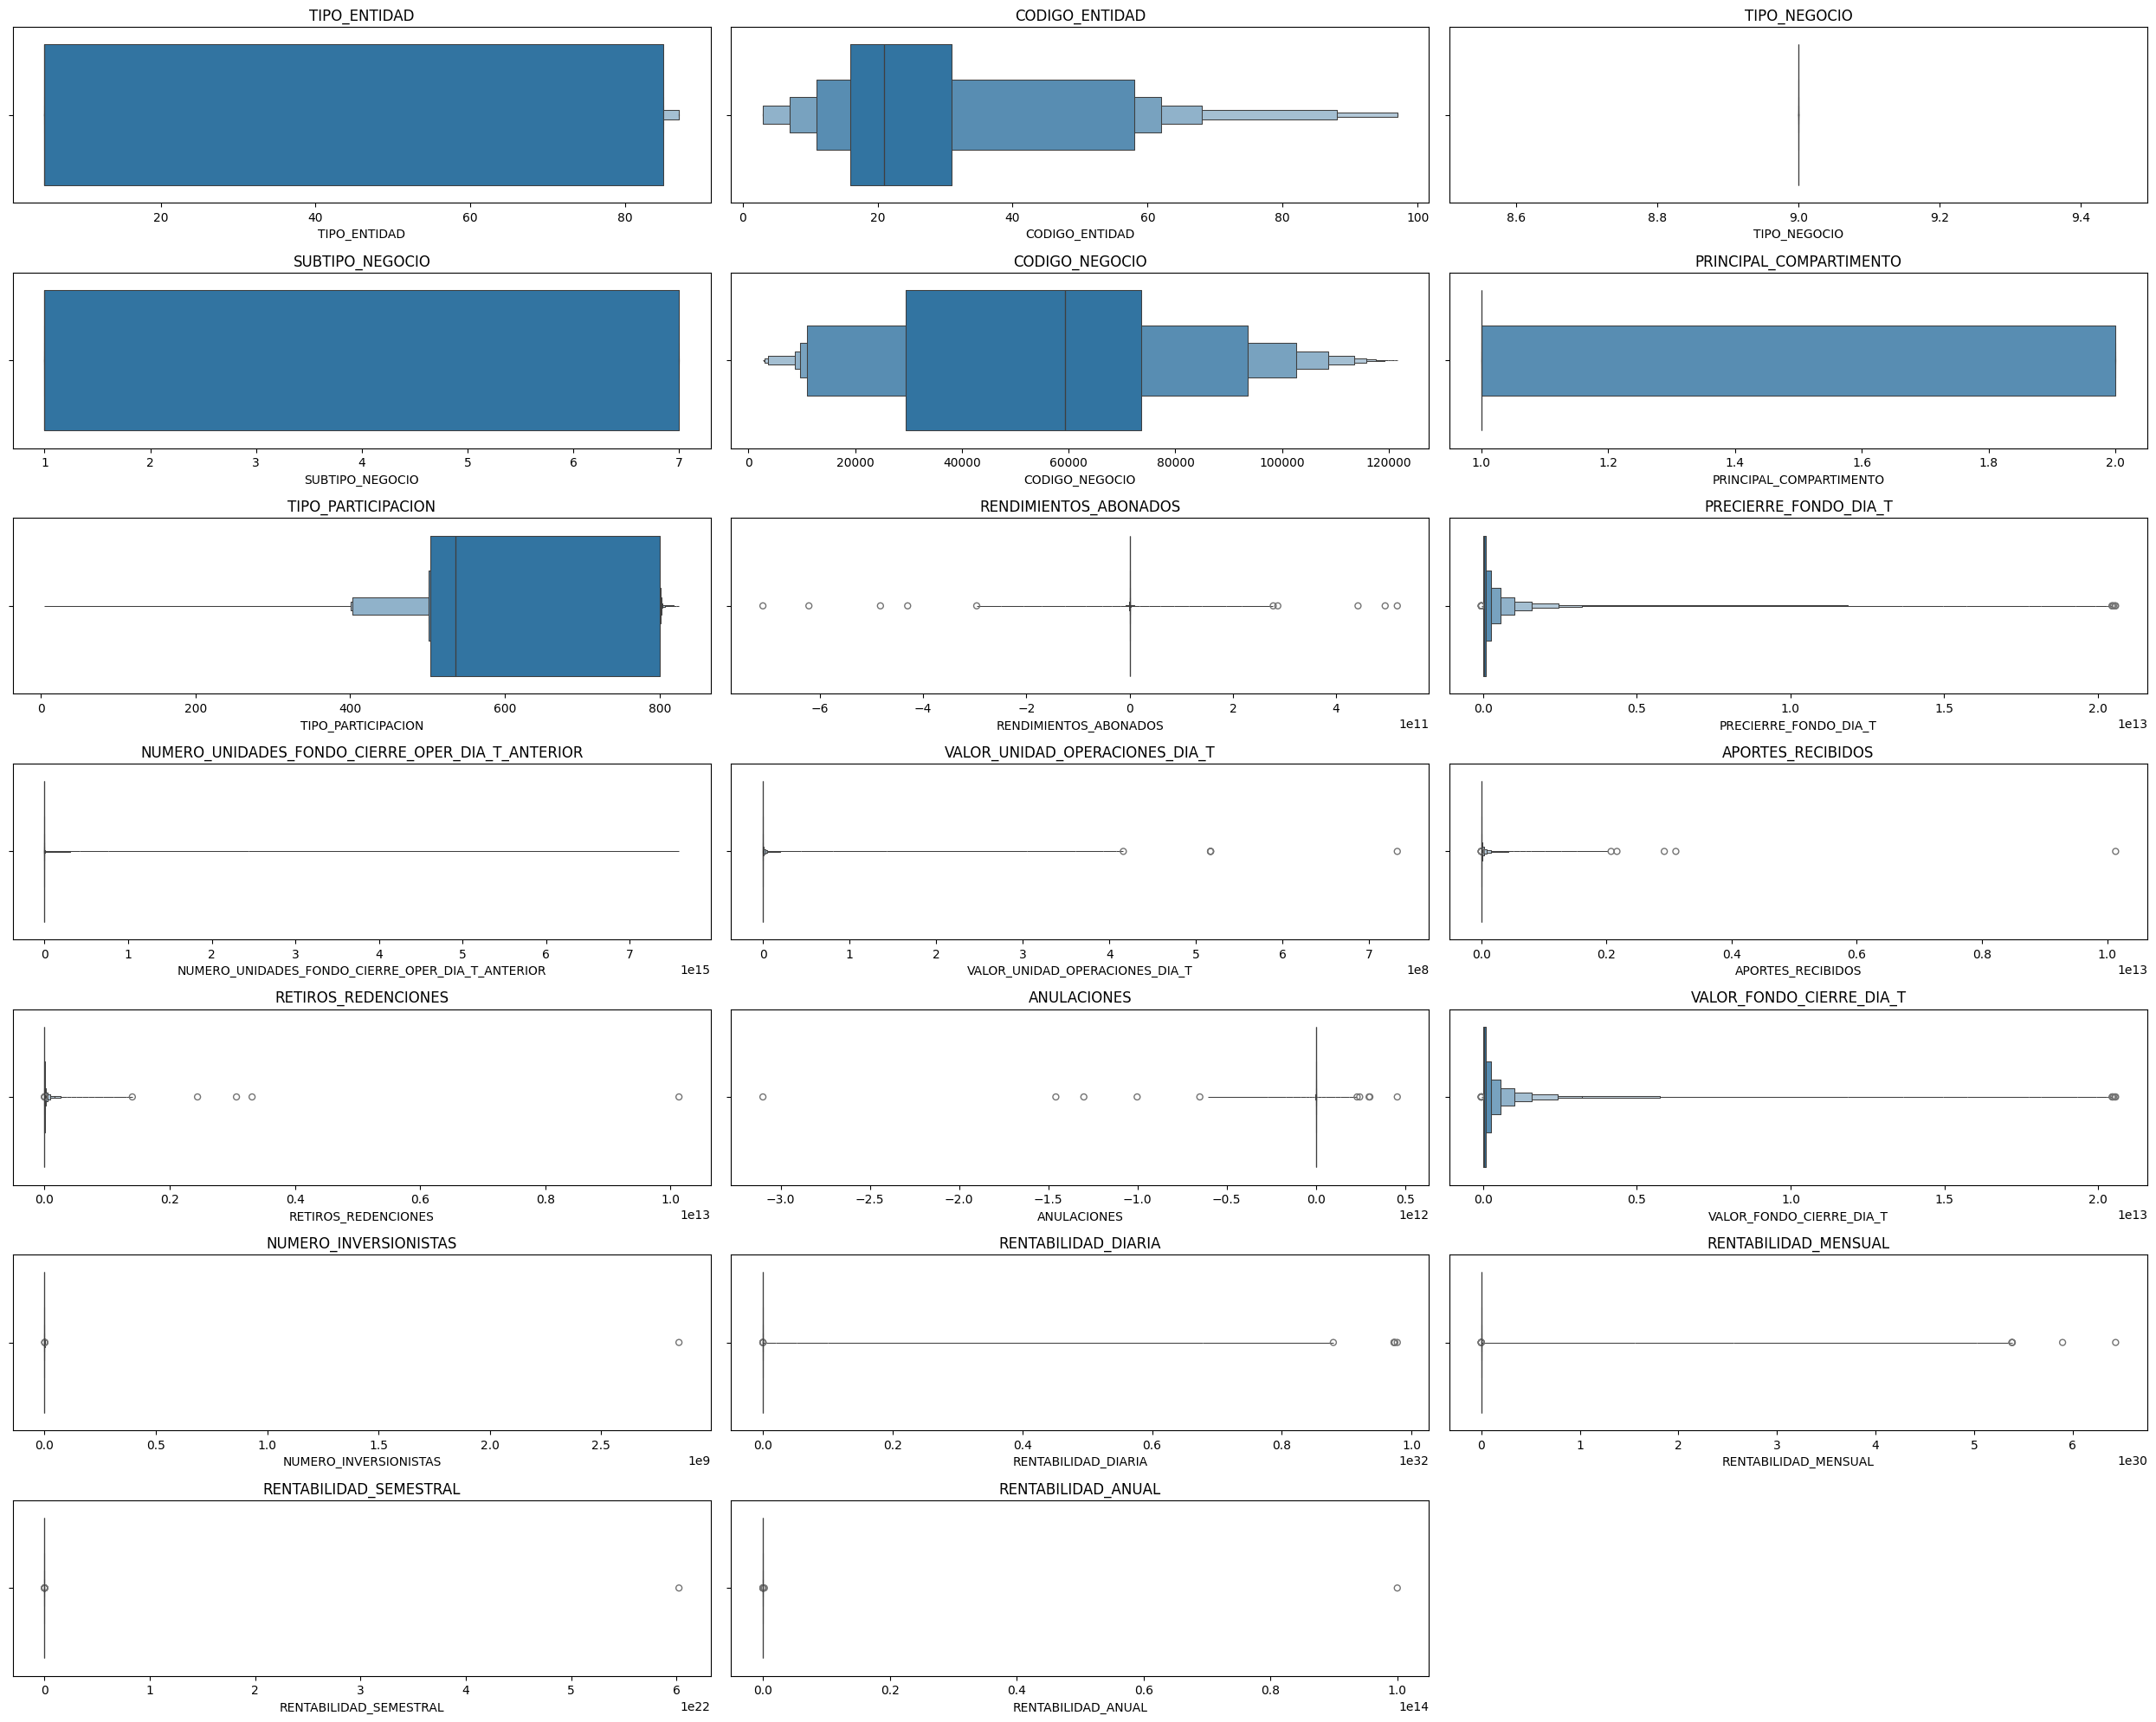

In [20]:

numeric_cols = df_FondosInversion_colectiva.select_dtypes(include=['Float64', 'int64']).columns

num_plots = len(numeric_cols)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols  # Calcula cuántas filas se necesitan

plt.figure(figsize=(25, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxenplot(data=df_FondosInversion_colectiva, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()



Estamos viendo que los datos esta demasiado dispersos uno de los otros, sin embargo no son valores atipicos ya que al momento de realizar las filtraciones, nos damos cuenta que no son atipicos. Esto se debe a la propia naturaleza de la base de datos

In [21]:
print(f'Dato maximo: {df_FondosInversion_colectiva['RENTABILIDAD_ANUAL'].max()}')
print(f'Dato minimo: {df_FondosInversion_colectiva['RENTABILIDAD_ANUAL'].min()}')

Dato maximo: 100000000000000.0
Dato minimo: -153.488372


- Grafica de barras ver la rentabilidad anual acorde al tipo de entidad

In [22]:

resultado = df_FondosInversion_colectiva.groupby('NOMBRE_TIPO_ENTIDAD')['RENTABILIDAD_ANUAL'].mean().reset_index()


# Crear el gráfico de barras y mostrar la frecuencia encima de cada barra
fig = px.bar(x=resultado['NOMBRE_TIPO_ENTIDAD'], 
             y=resultado['RENTABILIDAD_ANUAL'],
             labels={'x':'Nombre de tipo entidad', 'y':'Rentabilidad anual'},
             title='Rentabilidad Anual por Tipo de Entidad',
             text=resultado['RENTABILIDAD_ANUAL']  # Mostrar la frecuencia encima de las barras
            )

fig.update_layout(height=700, width=800)

# Ajustar el formato del texto encima de las barras
fig.update_traces(textposition='outside')  # Colocar las etiquetas fuera de las barras

# Mostrar gráfico
fig.show()

- Contar los valores a corde al nombre de la entidad

In [23]:
frecuencia_entidades = df_FondosInversion_colectiva['NOMBRE_TIPO_ENTIDAD'].value_counts().reset_index()

frecuencia_entidades.columns = ['Nombre de tipo entidad', 'Frecuencia']

fig = px.bar(x=frecuencia_entidades['Nombre de tipo entidad'], 
             y=frecuencia_entidades['Frecuencia'],
             labels={'x':'Nombre de entidad', 'y':'Frecuencia'},
             title='Frecuencia de Nombre de entidad',
             text=frecuencia_entidades['Frecuencia']  
            )

fig.update_layout(height=800, width=1000)

fig.update_traces(textposition='outside')  

# Mostrar gráfico
fig.show()


*Porcentaje representativo*

In [24]:

# Contar la frecuencia de cada entidad y convertirlo en un DataFrame
frecuencia_entidades = df_FondosInversion_colectiva['NOMBRE_TIPO_ENTIDAD'].value_counts().reset_index()

# Renombrar las columnas para mejor legibilidad
frecuencia_entidades.columns = ['Nombre de tipo entidad', 'Frecuencia']

# Crear gráfico de pastel
fig = px.pie(names=frecuencia_entidades['Nombre de tipo entidad'], 
             values=frecuencia_entidades['Frecuencia'],
             title='Proporción de tipos de entidades')

fig.update_layout(height=600, width=800)

# Mostrar gráfico
fig.show()

## ELIMINACION Y RENOMBRE DE COLUMNAS NECESARIAS

In [25]:
df_FondosInversion_colectiva['FECHA_CORTE'] = pd.to_datetime(df_FondosInversion_colectiva['FECHA_CORTE'], format='%Y-%m-%d')  

df1 = df_FondosInversion_colectiva.groupby('FECHA_CORTE').size().sort_index(key=lambda x: x.year)
print(df1)


ValueError: time data "20/07/2020" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [29]:
columnas_a_eliminar = [
                        'TIPO_NEGOCIO','NOMBRE_TIPO_PATRIMONIO'
                    ]

try:
    df_FondosInversion_colectiva = df_FondosInversion_colectiva.drop(columns=columnas_a_eliminar)
    print("Las columnas seleccionadas se eliminaron con éxito")
except KeyError as e:
    print("Error al aliminar columnas")

df_FondosInversion_colectiva

Las columnas seleccionadas se eliminaron con éxito


,FECHA_CORTE,TIPO_ENTIDAD,NOMBRE_TIPO_ENTIDAD,CODIGO_ENTIDAD,NOMBRE_ENTIDAD,SUBTIPO_NEGOCIO,NOMBRE_SUBTIPO_PATRIMONIO,CODIGO_NEGOCIO,NOMBRE_PATRIMONIO,PRINCIPAL_COMPARTIMENTO,...,VALOR_UNIDAD_OPERACIONES_DIA_T,APORTES_RECIBIDOS,RETIROS_REDENCIONES,ANULACIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_DIARIA,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL
0,20/07/2020,87,SOCIEDADES ADMINISTRADORAS DE INVERSIÓN,11,Progresion Sociedad Administradora De Inversio...,1,FIC DE TIPO GENERAL,63109,FONDO DE INVERSION COLECTIVA ABIERTO PROGRESIO...,1,...,1.181368e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.832705e+09,174.0,1.661225,3.968064,4.398817,3.585329
1,12/09/2021,5,SF-SOCIEDAD FIDUCIARIA,39,Sociedad Fiduciaria De Desarrollo Agropecuario...,1,FIC DE TIPO GENERAL,69537,FONDO DE INVERSION COLECTIVA ABIERTO FIC 600,1,...,1.332654e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.059409e+11,6.0,2.056766,2.289001,1.044863,1.098479
2,09/12/2022,5,SF-SOCIEDAD FIDUCIARIA,7,Skandia Fiduciaria S.A.,1,FIC DE TIPO GENERAL,97207,FONDO DE INVERSIÓN COLECTIVA CON PACTO DE PERM...,1,...,9.521426e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.189565e+09,1.0,-61.082414,6.700275,4.908149,-3.436502
3,23/08/2019,5,SF-SOCIEDAD FIDUCIARIA,38,Fiduciaria Central S.A. Sigla Fiducentral S.A.,7,FONDOS DE CAPITAL PRIVADO,73593,FCP VALOR FORESTAL CACAO 01 (EN LIQUIDACIÓN),2,...,7.098215e+03,0.000000e+00,0.000000e+00,0.000000e+00,6.487057e+09,20.0,-5.188327,319.467674,-33.798042,-34.151399
4,04/06/2017,5,SF-SOCIEDAD FIDUCIARIA,3,Bbva Asset Management S.A. Sociedad Fiduciaria,1,FIC DE TIPO GENERAL,8742,FIC ABIERTO BBVA FAM CON PARTICIPACIONES DIFER...,1,...,2.224918e+03,0.000000e+00,3.210000e+00,0.000000e+00,4.432557e+10,17.0,6.363919,7.210620,9.222093,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165929,25/06/2019,5,SF-SOCIEDAD FIDUCIARIA,58,Fiduciaria Sura S.A.,1,FIC DE TIPO GENERAL,53965,FIC CORPORATIVO II,1,...,1.540200e+04,1.454000e+10,1.378697e+10,0.000000e+00,1.828384e+10,19.0,6.447227,4.542283,6.339766,6.342125
2165930,22/05/2019,5,SF-SOCIEDAD FIDUCIARIA,16,Alianza Fiduciaria S.A.,1,FIC DE TIPO GENERAL,10936,FONDO ABIERTO ALIANZA,1,...,1.441174e+05,1.660222e+10,2.231338e+10,-1.019877e+10,4.651954e+11,22.0,6.372663,4.380132,4.022688,3.901669
2165931,12/09/2018,5,SF-SOCIEDAD FIDUCIARIA,21,Fiduciaria De Occidente S.A. - Fiduoccidente ...,1,FIC DE TIPO GENERAL,9452,FONDO DE INVERSIÓN COLECTIVA ABIERTO CON PACTO...,1,...,2.387673e+03,0.000000e+00,1.500000e+07,0.000000e+00,4.479968e+09,117.0,32.036194,0.843093,-6.836207,-1.554998
2165932,30/01/2020,5,SF-SOCIEDAD FIDUCIARIA,23,Itaú Fiduciaria,1,FIC DE TIPO GENERAL,48153,FONDO DE INVERSION COLECTIVA ABIERTO ITAU CORT...,1,...,4.308606e+06,2.717348e+09,7.697813e+09,-7.000000e+08,1.220547e+11,1224.0,5.539723,5.479480,3.684894,4.332866


Reemplazamos el nombre de la columna "VALOR_UNIDAD_OPERACIONES_DIA_T" por "VALOR_OPERACIONES_DIA_T" para entender la funcionalidad de las dinamicas diarias con respecto el TRM

In [24]:
df_FondosInversion_colectiva.rename(columns={'VALOR_UNIDAD_OPERACIONES_DIA_T': 'VALOR_OPERACIONES_DIA_T'})

,FECHA_CORTE,TIPO_ENTIDAD,NOMBRE_TIPO_ENTIDAD,CODIGO_ENTIDAD,NOMBRE_ENTIDAD,SUBTIPO_NEGOCIO,NOMBRE_SUBTIPO_PATRIMONIO,CODIGO_NEGOCIO,NOMBRE_PATRIMONIO,PRINCIPAL_COMPARTIMENTO,...,VALOR_OPERACIONES_DIA_T,APORTES_RECIBIDOS,RETIROS_REDENCIONES,ANULACIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_DIARIA,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL
0,20/07/2020,87,SOCIEDADES ADMINISTRADORAS DE INVERSIÓN,11,Progresion Sociedad Administradora De Inversio...,1,FIC DE TIPO GENERAL,63109,FONDO DE INVERSION COLECTIVA ABIERTO PROGRESIO...,1,...,11813.7,0.0,0.0,0.0,6832704688.6,174.0,1.7,4.0,4.4,3.6
1,12/09/2021,5,SF-SOCIEDAD FIDUCIARIA,39,Sociedad Fiduciaria De Desarrollo Agropecuario...,1,FIC DE TIPO GENERAL,69537,FONDO DE INVERSION COLECTIVA ABIERTO FIC 600,1,...,13326.5,0.0,0.0,0.0,105940936849.3,6.0,2.1,2.3,1.0,1.1
2,09/12/2022,5,SF-SOCIEDAD FIDUCIARIA,7,Skandia Fiduciaria S.A.,1,FIC DE TIPO GENERAL,97207,FONDO DE INVERSIÓN COLECTIVA CON PACTO DE PERM...,1,...,9521.4,0.0,0.0,0.0,1189565492.9,1.0,-61.1,6.7,4.9,-3.4
3,23/08/2019,5,SF-SOCIEDAD FIDUCIARIA,38,Fiduciaria Central S.A. Sigla Fiducentral S.A.,7,FONDOS DE CAPITAL PRIVADO,73593,FCP VALOR FORESTAL CACAO 01 (EN LIQUIDACIÓN),2,...,7098.2,0.0,0.0,0.0,6487056745.4,20.0,-5.2,319.5,-33.8,-34.2
4,04/06/2017,5,SF-SOCIEDAD FIDUCIARIA,3,Bbva Asset Management S.A. Sociedad Fiduciaria,1,FIC DE TIPO GENERAL,8742,FIC ABIERTO BBVA FAM CON PARTICIPACIONES DIFER...,1,...,2224.9,0.0,3.2,0.0,44325566471.2,17.0,6.4,7.2,9.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165929,25/06/2019,5,SF-SOCIEDAD FIDUCIARIA,58,Fiduciaria Sura S.A.,1,FIC DE TIPO GENERAL,53965,FIC CORPORATIVO II,1,...,15402.0,14540000000.0,13786967958.9,0.0,18283835774.3,19.0,6.4,4.5,6.3,6.3
2165930,22/05/2019,5,SF-SOCIEDAD FIDUCIARIA,16,Alianza Fiduciaria S.A.,1,FIC DE TIPO GENERAL,10936,FONDO ABIERTO ALIANZA,1,...,144117.4,16602216877.8,22313379342.7,-10198765402.9,465195438702.2,22.0,6.4,4.4,4.0,3.9
2165931,12/09/2018,5,SF-SOCIEDAD FIDUCIARIA,21,Fiduciaria De Occidente S.A. - Fiduoccidente ...,1,FIC DE TIPO GENERAL,9452,FONDO DE INVERSIÓN COLECTIVA ABIERTO CON PACTO...,1,...,2387.7,0.0,15000000.0,0.0,4479968228.4,117.0,32.0,0.8,-6.8,-1.6
2165932,30/01/2020,5,SF-SOCIEDAD FIDUCIARIA,23,Itaú Fiduciaria,1,FIC DE TIPO GENERAL,48153,FONDO DE INVERSION COLECTIVA ABIERTO ITAU CORT...,1,...,4308605.6,2717348162.5,7697812764.1,-700000000.0,122054686562.2,1224.0,5.5,5.5,3.7,4.3


# VERIFICACION DE DONDE SE ENCUENTRA EL MAYOR CONJUNTO DE DATOS EN RELACION A LAS RENTABILIDADES

In [29]:

columnas_evaluar_Longitud = ['RENTABILIDAD_SEMESTRAL','RENTABILIDAD_ANUAL', 'RENTABILIDAD_DIARIA']

for ColumnaActual in columnas_evaluar_Longitud:
    cifra_Len1 = 0
    cifra_Len2 = 0
    cifra_Len3 = 0
    cifra_Len4 = 0
    
    for char in df_FondosInversion_colectiva[ColumnaActual]:
        #Nota: no cuenta el punto
        char_str = str(char)
        solo_digitos = ''.join(c for c in char_str if c.isdigit())

        x = len(solo_digitos)

        if x == 1:
            cifra_Len1 += 1
        if x == 2:
            cifra_Len2 += 1
        elif x == 3:
            cifra_Len3 += 1
        else:
            cifra_Len4 += 1


    print(ColumnaActual)
    print(f"Cifras de longitud 1: {cifra_Len1}")
    print(f"Cifras de longitud 2: {cifra_Len2}")
    print(f"Cifras de longitud 3: {cifra_Len3}")
    print(f"Cifras de longitud mayor a 3: {cifra_Len4} \n")

RENTABILIDAD_SEMESTRAL
Cifras de longitud 1: 0
Cifras de longitud 2: 215800
Cifras de longitud 3: 8546
Cifras de longitud mayor a 3: 1941588 

RENTABILIDAD_ANUAL
Cifras de longitud 1: 0
Cifras de longitud 2: 366533
Cifras de longitud 3: 13685
Cifras de longitud mayor a 3: 1785716 

RENTABILIDAD_DIARIA
Cifras de longitud 1: 0
Cifras de longitud 2: 103240
Cifras de longitud 3: 18060
Cifras de longitud mayor a 3: 2044634 



In [31]:

# Crear gráfico de pastel
fig = px.pie(names=('Longitud 1','Longitud 2','Lontidud 3', 'longitud 4'), 
             values=(cifra_Len1,
                     cifra_Len2,
                     cifra_Len3,
                     cifra_Len4),
             title=ColumnaActual)

fig.update_layout(height=600, width=800)

# Mostrar gráfico
fig.show()

# VISUALIZACION GENERAL DE DATOS

In [4]:
from PIL import Image, ImageColor, ImageDraw, ImageFont
from wordcloud import WordCloud
from ydata_profiling import ProfileReport

In [5]:
profile = ProfileReport(
    df_FondosInversion_colectiva,
    title='Reporte',
    minimal=True  # Reduce el análisis para evitar cálculos pesados
)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Nos indica que los valores están demasiado dispersos, y que realiza demasiado calculos para el numero de registros